In [33]:
def num_grid_points(r):
    total = 0
    for x in range(r + 1):
        for y in range(r + 1):
            if x**2 + y**2 <= r**2:
                total = total + 1
    return 4 * (total - r) - 3

points_list = []
for i in range(12):
    points_list.append(num_grid_points(i))
print(points_list)

[1, 5, 13, 29, 49, 81, 113, 149, 197, 253, 317, 377]


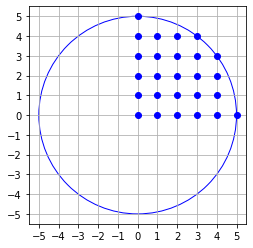

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def show_grid_points(r):
    circle = plt.Circle((0,0), r, color='b', fill=False)
    ax = plt.gca()
    ax.add_patch(circle)
    plt.xticks(np.arange(-(r+1),r+2,1))
    plt.yticks(np.arange(-(r+1),r+2,1))
    ax.set_aspect('equal')
    plt.grid()
    for x in range(r + 1):
        for y in range(r + 1):
            if x**2 + y**2 <= r**2:
                plt.plot(x, y,'bo')

show_grid_points(5)


[(-2, -2), (-2, -1), (-2, 0), (-2, 1), (-2, 2), (-1, -2), (-1, -1), (-1, 0), (-1, 1), (-1, 2), (0, -2), (0, -1), (0, 0), (0, 1), (0, 2), (1, -2), (1, -1), (1, 0), (1, 1), (1, 2), (2, -2), (2, -1), (2, 0), (2, 1), (2, 2)]


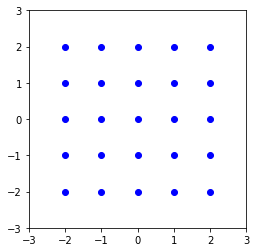

In [1]:
import matplotlib.pyplot as plt

unit = 1
points = []
index = 2
for x in range(-index, index + 1, 1):
    for y in range(-index, index + 1, 1):
        points.append((x * unit, y * unit))
print(points)

plt.gca().set_aspect('equal')
plt.xlim((-(index+1), index+1))
plt.ylim((-(index+1), index+1))
for point in points:
    plt.plot(point[0], point[1], 'bo')


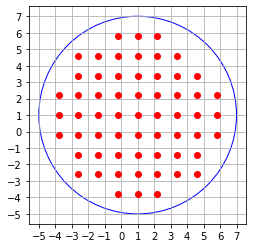

In [4]:
import numpy as np
import matplotlib.pyplot as plt

ieos_a000328 = [1, 5, 13, 29, 49, 81, 113, 149, 197, 253, 317, 377, 441, 529, 613, 709, 797, 901, 1009, 1129, 1257,
                1373, 1517, 1653, 1793, 1961, 2121, 2289, 2453, 2629, 2821, 3001, 3209, 3409, 3625, 3853, 4053, 4293,
                4513, 4777, 5025, 5261, 5525, 5789, 6077, 6361, 6625]

def standard_grid(num_points, r_theta, r_phi, center_x, center_y):
    """Given the arm lengths r_theta, r_phi and the center of a positioner, return a list of numpoints many
    (x,y) coordinates spaced evenly within the span of the two arms."""
    r = r_theta + r_phi
    index = np.searchsorted(ieos_a000328, num_points)
    unit = r / index
    square = []
    for x in range(-index, index + 1, 1):
        for y in range(-index, index + 1, 1):
            square.append((x * unit + center_x, y * unit + center_y, (x * unit) ** 2 + (y * unit) ** 2))
    # throw out points outside the circle
    circ = []
    for point in square:
        if point[2] <= r ** 2:
            circ.append(point)
    # throw out extraneous points if any, starting with the points closest to the edge
    circ = np.asarray(circ)
    circ = sorted(circ, key=lambda a: a[2])
    return circ[0:num_points]

def show_circ_grid(num_points, r_theta, r_phi, center_x, center_y):
    points = standard_grid(num_points, r_theta, r_phi, center_x, center_y)
    r = r_theta + r_phi
    circle = plt.Circle((center_x, center_y), r, color='b', fill=False)
    ax = plt.gca()
    ax.add_patch(circle)
    plt.xticks(np.arange(-(r+1+center_x),r+2+center_x,1))
    plt.yticks(np.arange(-(r+1+center_y),r+2+center_y,1))
    ax.set_aspect('equal')
    plt.grid()
    for point in points:
        plt.plot(point[0], point[1], 'ro')
        
show_circ_grid(60, 3, 3, 1, 1)

In [40]:
import numpy as np
from math import pi
import math

def fuzzy_circle(center_x, center_y, radius, num_points, sd=0.1):
    points = np.empty((num_points, 2))
    increment = 2 * pi / num_points
    for i in range(num_points):
        theta = i * increment
        x = radius * math.cos(theta) + center_x
        y = radius * math.sin(theta) + center_y
        points[i][0] = x
        points[i][1] = y
    fuzzer = np.random.normal(0, sd, (num_points, 2))
    points = points + fuzzer
    return points

0.055702210412340455 -0.1370092736212141 3.0733318955400417 0.2238857627426497


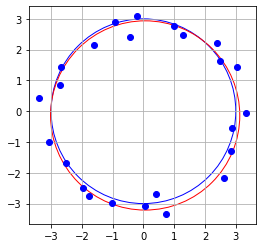

In [41]:
import matplotlib.pyplot as plt
from circle_fit import standardLSQ, hyperLSQ, hyperSVD

def visualize(center_x, center_y, radius, num_points, sd, fit_method='standardLSQ'):
    points = fuzzy_circle(center_x, center_y, radius, num_points, sd)
    circle = plt.Circle((center_x, center_y), radius, color='b', fill=False)
    ax = plt.gca()
    ax.add_patch(circle)
    ax.set_aspect('equal')
    plt.grid()
    plt.xticks(np.arange(-(radius + 1 + center_x), radius + 2 + center_x, 1))
    plt.yticks(np.arange(-(radius + 1 + center_y), radius + 2 + center_y, 1))
    for point in points:
        plt.plot(point[0], point[1], 'bo')
    x = None
    y = None
    r = None
    s = None
    if fit_method == 'standardLSQ':
        x, y, r, s = standardLSQ(points)
    elif fit_method == 'hyperLSQ':
        x, y, r, s = hyperLSQ(points)
    elif fit_method == 'hyperSVD':
        x, y, r, s = hyperSVD(points)
    circ_approx = plt.Circle((x, y), r, color='r', fill=False)
    ax.add_patch(circ_approx)
    print(x, y, r, s)
        
visualize(0, 0, 3, 24, 0.3)